# Assignment 10: Dimensionality Reduction
#### Greg DeVore
#### ML210
#### March 17th, 2018

Dataset(s) needed: Kaggle UCI wine (https://www.kaggle.com/c/uci-wine-quality-dataset/data),

In [145]:
# Read csv
wine.data <- read.csv('winequality-data.csv')
# Look at data
str(wine.data)

'data.frame':	3918 obs. of  13 variables:
 $ fixed.acidity       : num  6.7 6.7 6.1 6.6 6.8 8.3 6.8 6.3 6.7 5.9 ...
 $ volatile.acidity    : num  0.15 0.44 0.17 0.39 0.32 0.28 0.14 0.21 0.31 0.27 ...
 $ citric.acid         : num  0.38 0.31 0.21 0.22 0.34 0.27 0.35 0.31 0.08 0.29 ...
 $ residual.sugar      : num  1.7 1.9 1.9 4 6 17.5 1.5 1.2 1.3 11.4 ...
 $ chlorides           : num  0.037 0.03 0.09 0.038 0.05 0.045 0.047 0.043 0.038 0.036 ...
 $ free.sulfur.dioxide : num  20 41 44 17 5 48 40 30 58 31 ...
 $ total.sulfur.dioxide: num  84 104 130 98 129 253 117 117 147 115 ...
 $ density             : num  0.99 0.99 0.993 0.99 0.995 ...
 $ pH                  : num  3.09 3.29 3.07 3.25 3.19 3.02 3.07 3.49 3.18 3.35 ...
 $ sulphates           : num  0.53 0.62 0.41 0.53 0.4 0.56 0.72 0.68 0.46 0.48 ...
 $ alcohol             : num  11.4 12.6 9.7 13 9.1 9.1 11.1 11 10 10.5 ...
 $ quality             : int  6 7 5 7 5 6 6 6 5 8 ...
 $ id                  : int  981 982 983 984 985 986 987 988

### 1. Split the dataset into training and test sets.

In [146]:
set.seed(0327)
trainFrac <- 0.7
trainInd <- sample(seq(1,nrow(wine.data)),
                   round(trainFrac*nrow(wine.data)),replace = FALSE)
wine.train <- wine.data[trainInd,]
wine.test <- wine.data[-trainInd,]

### 2. Build and train a PCA model from the wine dataset. Use prcomp(). Include prcomp's scale=TRUE argument.

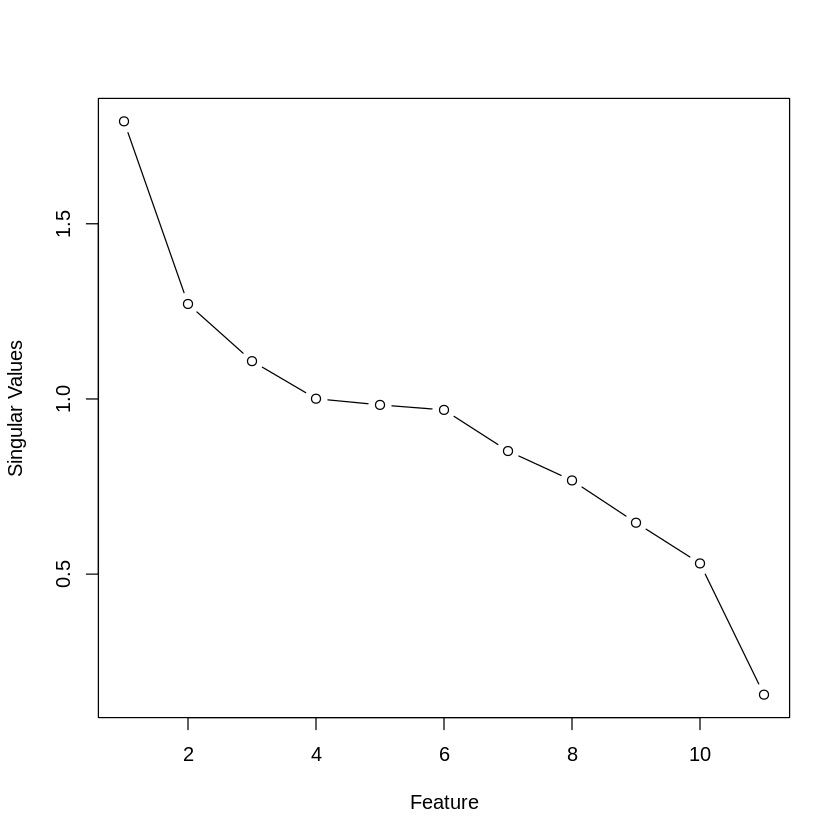

In [147]:
library(dplyr)
# Perform PCA on wine data, neglecting quality and ID features
wine.pca <- prcomp(wine.train %>% select(-c(quality,id)), scale. = TRUE)
# Plot singular values
plot(seq(1,ncol(wine.train)-2),wine.pca$sdev,'b',
     xlab = 'Feature',ylab='Singular Values')

Note that there is not a strong 'elbow' in the singular values plot, meaning that there is not a small subset that adequately captures the majority of the variance in the data.

In [148]:
# View principal components
wine.pca$rotation

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
fixed.acidity,0.14876102,-0.59164667,0.16686147,-0.09959596,0.16766214,-0.02394587,0.16455207,0.59736283,0.37259454,-0.10281649,-0.16751308
volatile.acidity,0.02462742,-0.04108907,-0.58582810,-0.41599033,0.50635728,-0.28345710,-0.27697429,0.01768277,-0.14425316,-0.21564709,-0.01941533
citric.acid,0.13993295,-0.32050918,0.53528340,-0.16886637,-0.05503760,-0.11616779,-0.67474679,-0.20925808,-0.21384110,-0.03426660,-0.01224664
residual.sugar,0.43390207,-0.02400776,-0.18545311,0.16970181,0.15845437,0.34601892,-0.15339671,-0.40695029,0.38849369,0.09693006,-0.50364899
chlorides,0.21735426,0.03095118,-0.15377077,-0.44191044,-0.62407697,-0.43407305,0.07162090,-0.13683038,0.35698384,0.05467451,-0.02642958
free.sulfur.dioxide,0.29631497,0.32385329,0.28440296,0.31068638,0.21154005,-0.45031903,0.11909549,-0.07929898,0.15791114,-0.57942299,0.03507149
total.sulfur.dioxide,0.40512337,0.25050914,0.13131995,0.02491130,0.25829796,-0.32875028,0.04296272,0.22943070,-0.16054808,0.70643903,-0.03382482
density,0.51142791,-0.02282003,-0.12506915,-0.02156865,-0.01673285,0.34203667,-0.09944380,0.06546142,0.10569341,-0.05073210,0.75935832
pH,-0.12597306,0.57189316,0.06597282,-0.12699337,-0.09438300,0.21368831,-0.47960199,0.49697319,0.28170629,-0.07926749,-0.13919858
sulphates,0.04193444,0.21831158,0.38936509,-0.67109610,0.26089401,0.30499632,0.37873718,-0.19110391,-0.02203997,-0.07171410,-0.04389470


The first principal component separates the data primarily by alcohol and residual sugar. This makes sense because there is a tradeoff between the two; sugar is converted into alcohol during the winemaking process.

The second principal component separates the data primarily by pH and acidity, and to a lesser extent by sulphates/sulfur dioxides. This also makes sense because pH and acidity are inversely related (the higher the acidity, the lower the pH).

We can observe this in a biplot of the data, which is shown below.

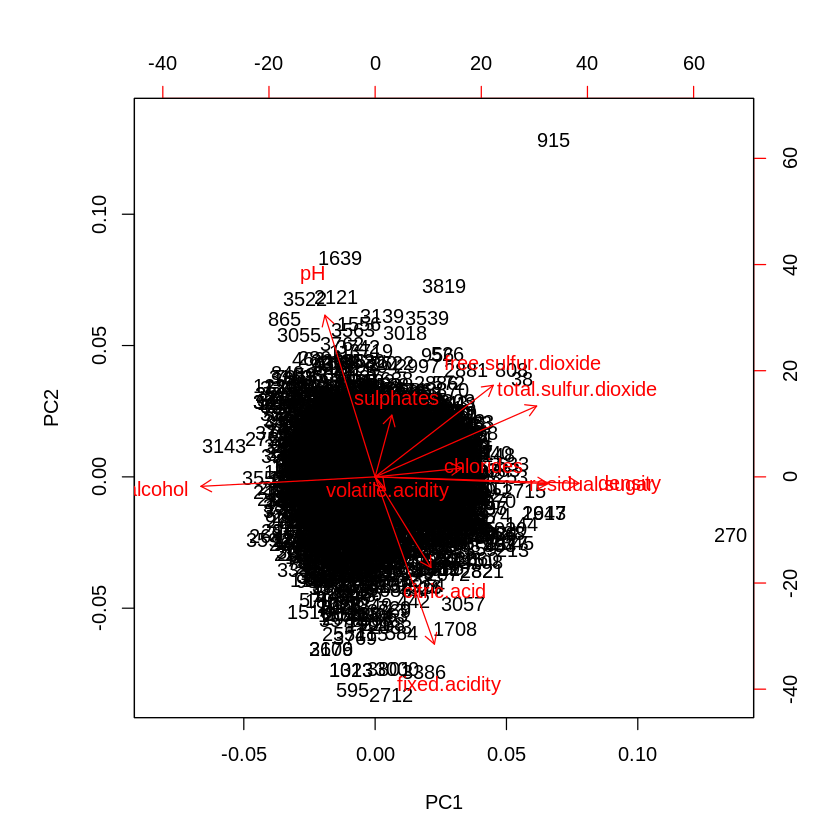

In [149]:
# Produce biplot of PCA1 vs PCA2
biplot(wine.pca)

### 3. Use Principal Components Regression to create a model to predict wine quality, selecting the best value for number of components and compare the result to linear regression.

Data: 	X dimension: 2743 11 
	Y dimension: 2743 1
Fit method: svdpc
Number of components considered: 11

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV            0.89   0.8453   0.8426   0.8179   0.8109   0.8035   0.8039
adjCV         0.89   0.8453   0.8426   0.8178   0.8100   0.8029   0.8037
       7 comps  8 comps  9 comps  10 comps  11 comps
CV      0.8047   0.7898   0.7544    0.7513    0.7517
adjCV   0.8045   0.7897   0.7542    0.7512    0.7513

TRAINING: % variance explained
         1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X         29.207     43.9    55.05    64.16    72.94    81.47    88.06    93.42
quality    9.837     10.5    15.64    17.37    18.72    18.94    18.94    21.95
         9 comps  10 comps  11 comps
X          97.22     99.78    100.00
quality    28.78     29.37     29.82


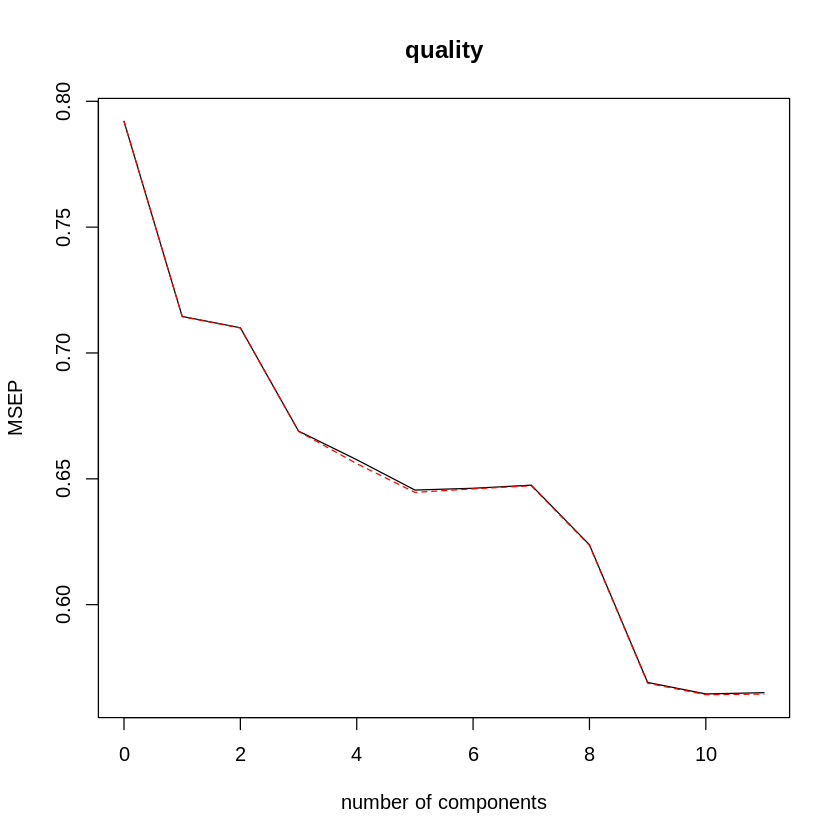

In [150]:
library(pls)
# Fit data using PCR
wine.pcr <- pcr(quality ~ ., data = wine.train %>% select(-id), 
                scale = TRUE, validation = 'CV')
summary(wine.pcr)
validationplot(wine.pcr, val.type = 'MSEP')

Looking at the results of the PCR fit, we see that using 9 of the 11 components captures just over 97% of the variance within the training features, and nearly 29% of the variance within the response (quality). Adding the final two components increases these to 100% and nearly 30%, respectively, but the cross-validated error remains roughly constant. This suggests that we could throw away the last two principal components without losing too much information.

Next, we need to create a standard linear regression model and compare the results on the test set.

In [151]:
# Create standard linear regression model
wine.lm <- lm(quality ~ ., data = wine.train %>% select(-id))
summary(wine.lm)


Call:
lm(formula = quality ~ ., data = wine.train %>% select(-id))

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5891 -0.4871 -0.0433  0.4627  3.1030 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           1.188e+02  2.246e+01   5.289 1.33e-07 ***
fixed.acidity         5.003e-02  2.635e-02   1.899   0.0577 .  
volatile.acidity     -1.924e+00  1.499e-01 -12.831  < 2e-16 ***
citric.acid          -4.648e-02  1.294e-01  -0.359   0.7196    
residual.sugar        7.332e-02  9.407e-03   7.795 9.12e-15 ***
chlorides            -1.143e+00  7.629e-01  -1.498   0.1342    
free.sulfur.dioxide   2.710e-03  1.114e-03   2.434   0.0150 *  
total.sulfur.dioxide -2.189e-04  5.034e-04  -0.435   0.6637    
density              -1.187e+02  2.279e+01  -5.210 2.02e-07 ***
pH                    6.344e-01  1.363e-01   4.656 3.38e-06 ***
sulphates             6.617e-01  1.319e-01   5.015 5.65e-07 ***
alcohol               2.400e-01  2.907e-02   8.257 2.30

Note that the linear regression model is capturing ~30% of the variance within the quality feature, as opposed to ~29% using PCR.

One of the advantages of using standard linear regression is interpretability. In PCR, each of the features is a linear combination of the 11 original features, so it is difficult to determine the effect of any single feature on the response variable of quality. Here though, we can clearly see that higher levels of sugar and alcohol are strongly linked to an increase in quality, and higher levels of volatile acidity are strongly linked to a decrease in quality.

Let's see how they compare when it comes to predicting wine quality by computing the mean standard error on the test data.

In [152]:
# PCR Predictions (using 9 PC)
wine.pcr.pred <- predict(wine.pcr, newdata = wine.test, ncomp = 9)
wine.pcr.mse <- mean((wine.pcr.pred - wine.test$quality)^2)
cat('MSE of PCR model (using 9 out of 11 principal components) =',
    wine.pcr.mse,'\n')

# Linear Regression Predictions
wine.lm.pred <- predict(wine.lm, newdata = wine.test)
wine.lm.mse <- mean((wine.lm.pred - wine.test$quality)^2)
cat('MSE of Linear Regression model =',wine.lm.mse,'\n')

MSE of PCR model (using 9 out of 11 principal components) = 0.5851411 
MSE of Linear Regression model = 0.575875 


Note that the MSE of the PCR model is slightly higher compared to the linear regression model. This is because we threw away some information by keeping only 9 of the 11 principal components. One of the main ideas behind princpal components is that you can keep just a subset of them and explain most of the variability in your data (i.e., you can carry a smaller amount of imformation without losing too much detail). If we kept all 11 components, the MSE's would be equal, but that would defeat the purpose of performing PCA in the first place.

In [153]:
# PCR Predictions (using all 11 PC)
wine.pcr.pred.all <- predict(wine.pcr, newdata = wine.test, ncomp = 11)
wine.pcr.mse <- mean((wine.pcr.pred.all - wine.test$quality)^2)
cat('MSE of PCR model (using all 11 principal components) =',
    wine.pcr.mse,'\n')

MSE of PCR model (using all 11 principal components) = 0.575875 


### 4. Produce  qualiplot that shows the difference between your predicted and actual values for wine quality on the test set.

Although it is typical to create a residuals versus fitted value plot, in this case it's easier to see what's going on if we plot the residuals versus the actual values, since quality is more like a factor than a typical quantitative variable (it only takes on integer values between 3 and 9).

Quality counts for test data:


  3   4   5   6   7   8   9 
  5  34 332 536 217  50   1 

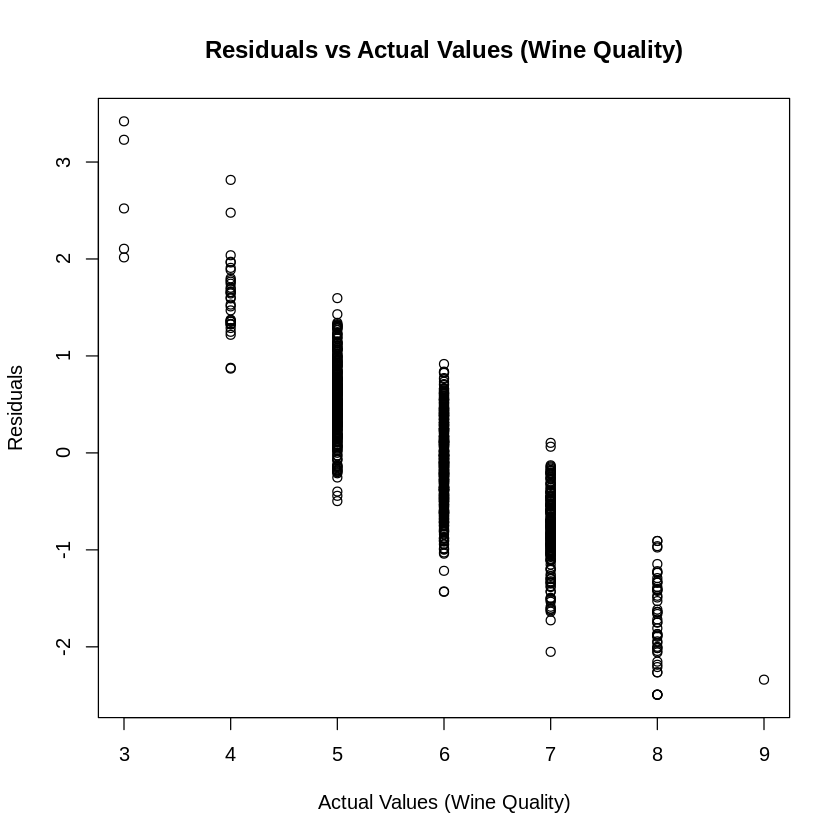

In [154]:
cat('Quality counts for test data:')
table(as.factor(wine.test$quality))
# Calculate and plot residuals from PCR predictions
pcr.resid <- wine.pcr.pred - wine.test$quality
plot(wine.test$quality, pcr.resid, 
     main = 'Residuals vs Actual Values (Wine Quality)', 
     xlab = 'Actual Values (Wine Quality)', 
     ylab = 'Residuals')

Note that there are very few wines outside of the 5-7 range in terms of quality, especially the extreme values of 3 or 9. This results in the model overestimating the quality of low quality wines, and underestimating the quality of high quality wines. The model is most likely to predict wines to be in the 5-7 range in terms of quality, since that's where the vast majority of the training data lies.

Let's take a closer look at the distribution of wine qualities.

Overall Wine Quality Counts:


   3    4    5    6    7    8    9 
  17  134 1163 1752  707  140    5 

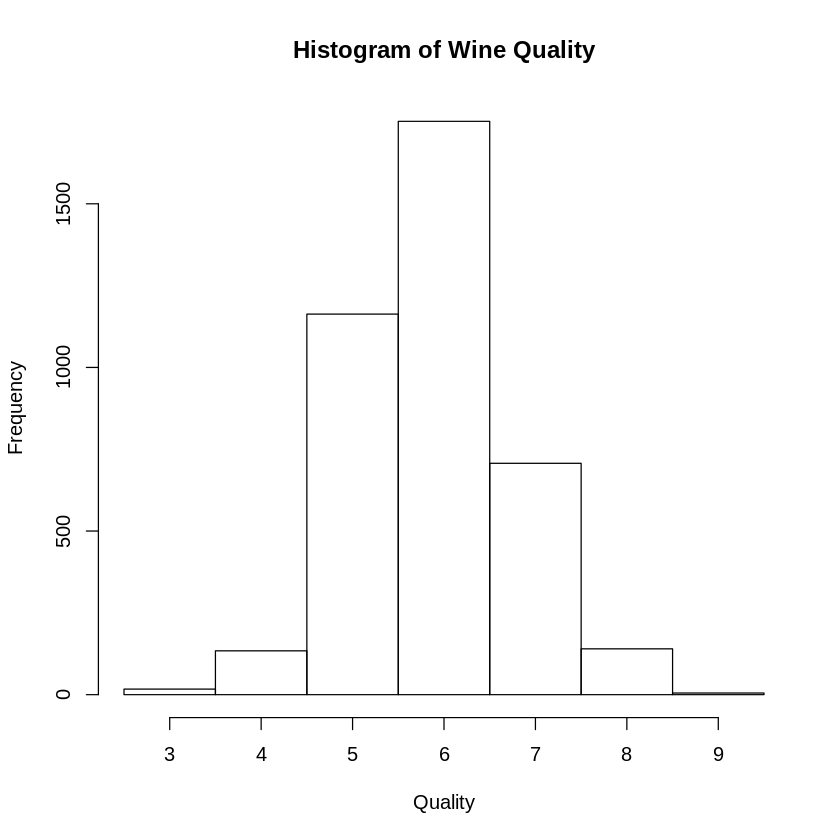

In [155]:
hist(wine.data$quality, main = 'Histogram of Wine Quality', 
     xlab = 'Quality', breaks = seq(2.5,9.5,1))
cat('Overall Wine Quality Counts:')
table(as.factor(wine.data$quality))

As expected, there are very few wines outside of the 5-7 range, especially 3's and 9's. Let's compare this to a histogram of the predicted values from the PCR model.

Range of predicted values from PCR model:

[1] 4.503049 7.103566

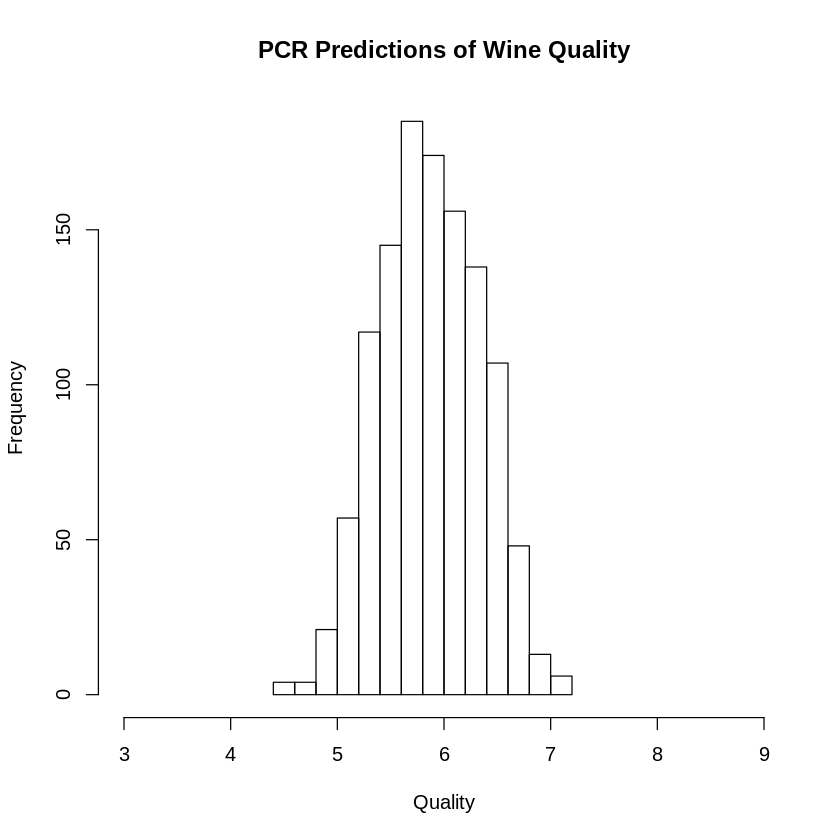

In [156]:
# Create histogram of predicted values from PCR model
hist(wine.pcr.pred, main = 'PCR Predictions of Wine Quality', 
     xlab = 'Quality', xlim = c(3,9))
cat('Range of predicted values from PCR model:')
range(wine.pcr.pred)

The model predicted no wines lower than a 4.5, or greater than a 7.1. To increase the robustness of the model, more wines should be added from the lower and higher extremes of quality.